<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/6440%20final%20project%20on%20churn%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


***`Problem: To Predict which customers are likely to churn (leave the service) so that the  MTN Telecommunication company can take proactive retention actions `***

In [9]:
# 2. Data Collection
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("\nData sample:")
print(df.head())



Data sample:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies       

In [10]:
# 3. Data Cleaning and Preprocessing
print("\nChecking for missing values...")
print(df.isnull().sum())


Checking for missing values...
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [11]:
# Drop customerID as it doesn't add predictive value
df.drop('customerID', axis=1, inplace=True)
print(df.head())

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [12]:
# Convert 'TotalCharges' to numeric (it may have some incorrect values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [13]:
# Handle missing values
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [15]:
# Encoding categorical variables
cat_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [17]:
# Feature Scaling
scaler = StandardScaler()
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.340876,1,2,0,2,0,2,2,2,2,1,1,3,0.665992,-0.128655,0
7039,0,0,1,1,1.613701,1,2,1,0,2,2,0,2,2,1,1,1,1.277533,2.243151,0
7040,0,0,1,1,-0.870241,0,1,0,2,0,0,0,0,0,0,1,2,-1.168632,-0.854469,0
7041,1,1,1,0,-1.155283,1,2,1,0,0,0,0,0,0,0,1,3,0.320338,-0.872062,1


In [18]:
# 4. Exploratory Data Analysis
print("\nPerforming Exploratory Data Analysis...")


Performing Exploratory Data Analysis...


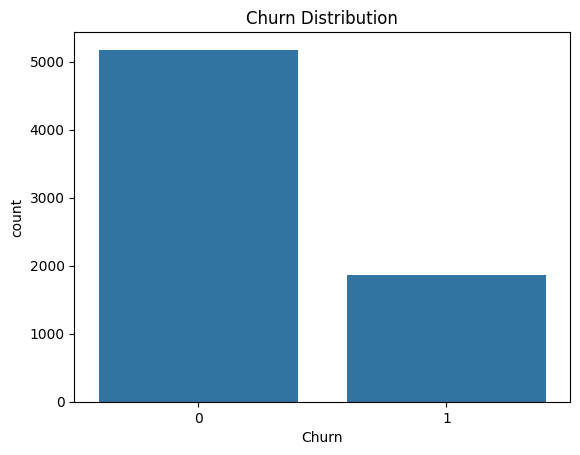

In [21]:
# Churn distribution
sns.countplot(x='Churn', data=df)
color_palette = sns.color_palette('pastel')
plt.title('Churn Distribution')
plt.show()

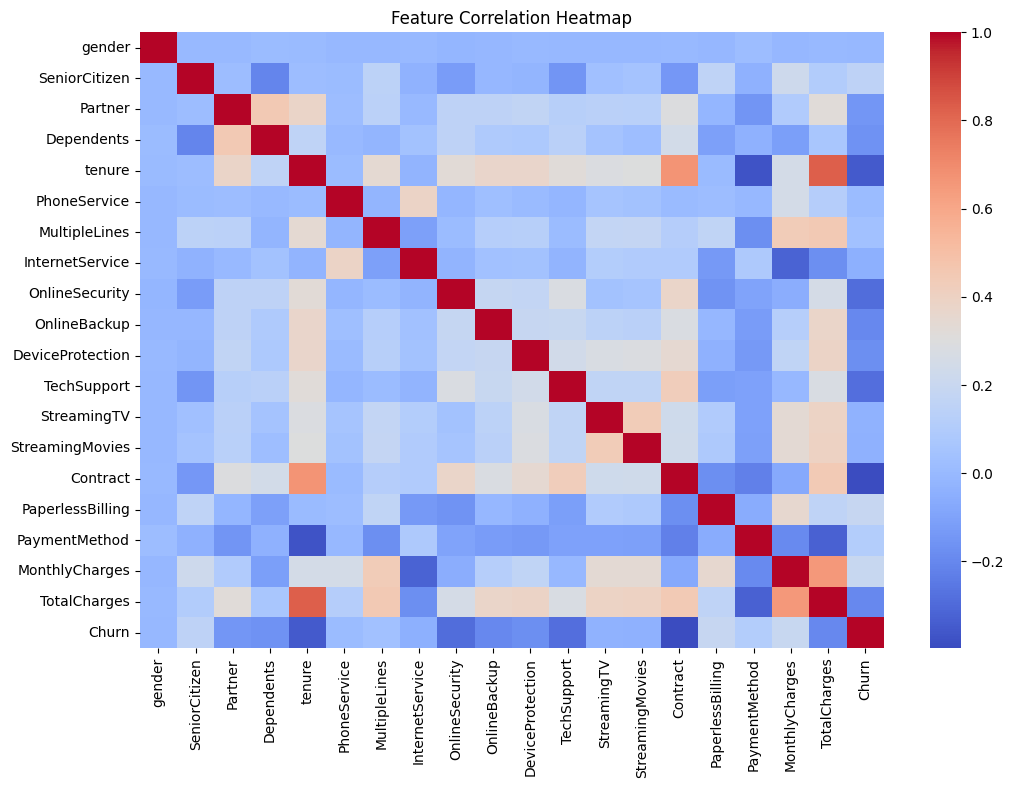

In [22]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

In [24]:
# 5. Model Selection and Training
print("\nSplitting data into training and testing sets...")
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Splitting data into training and testing sets...


In [28]:
# Try RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
from xgboost import XGBClassifier
# Try XGBClassifier
model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [30]:
print("Model selected: RandomForestClassifier due to its robustness, handling of non-linearities, and feature importance extraction capabilities.\n")


Model selected: RandomForestClassifier due to its robustness, handling of non-linearities, and feature importance extraction capabilities.



In [31]:
# 6. Model Evaluation
print("\nEvaluating model...")
y_pred = model.predict(X_test)


Evaluating model...


In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7835344215755855
ROC-AUC Score: 0.6966692372188351

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1036
           1       0.61      0.51      0.56       373

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

Confusion Matrix:
 [[913 123]
 [182 191]]


In [33]:
# 7. Results Interpretation
print("\nFeature Importance:")
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importances.sort_values('Importance', ascending=False, inplace=True)
print(feature_importances)


Feature Importance:
             Feature  Importance
14          Contract    0.378902
7    InternetService    0.103907
8     OnlineSecurity    0.081372
11       TechSupport    0.055989
5       PhoneService    0.047201
4             tenure    0.030723
13   StreamingMovies    0.027942
6      MultipleLines    0.026427
17    MonthlyCharges    0.025754
1      SeniorCitizen    0.025056
15  PaperlessBilling    0.024312
12       StreamingTV    0.024221
9       OnlineBackup    0.023552
16     PaymentMethod    0.022662
18      TotalCharges    0.022653
10  DeviceProtection    0.022035
3         Dependents    0.021737
0             gender    0.018481
2            Partner    0.017075


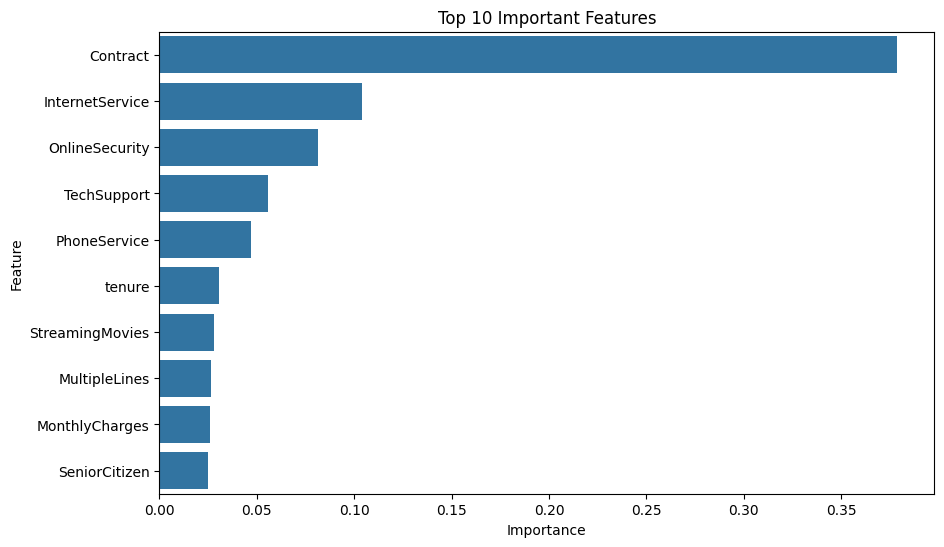

In [34]:
# Visualize important features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Important Features')
plt.show()

In [36]:
# 8. Clustering and Dimensionality Reduction
print("\nApplying PCA for dimensionality reduction...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("\nPCA explained variance ratio:", pca.explained_variance_ratio_)


Applying PCA for dimensionality reduction...

PCA explained variance ratio: [0.30128516 0.1288642 ]


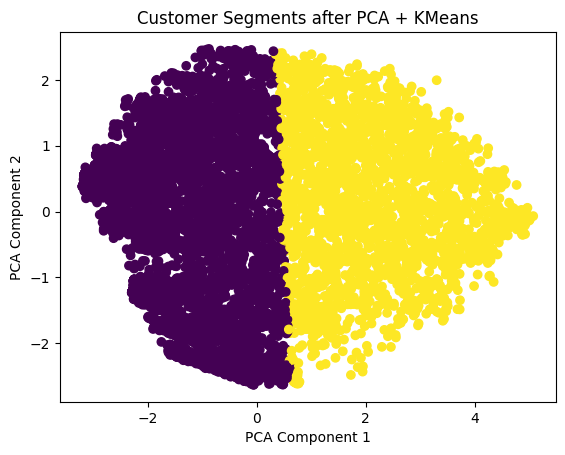

In [39]:
# Clustering with KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis')
plt.title('Customer Segments after PCA + KMeans')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()